# Week 6 Assignment 

57584800 WANG Guanzhang 15/03/2023

In [49]:
# Data prepare
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np

data = pd.read_csv('Credit_approval.csv',header='infer')

Y = data['Approved'] #this is our prediction target
X = data.drop(['Approved'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42) 

## 1.  Plot confusion matrix of the FOUR classifiers and calculate the accuracy, precision, recall, F-score of these classifiers using the confusion matrix (30 points)

First of all, build these classifiers

In [50]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

#RandomForest
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf1 = RandomForestClassifier(max_depth=2,n_estimators=500)
clf1 = clf1.fit(X_train, Y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

#Bagging
from sklearn.ensemble import BaggingClassifier
np.random.seed(1)
clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain2 = clf2.predict(X_train)
Y_predTest2 = clf2.predict(X_test)

#Adaboost
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain3 = clf3.predict(X_train)
Y_predTest3 = clf3.predict(X_test)

Now Let's make these confusion metrixs

Text(0.5, 0.98, 'The confusion matrix set')

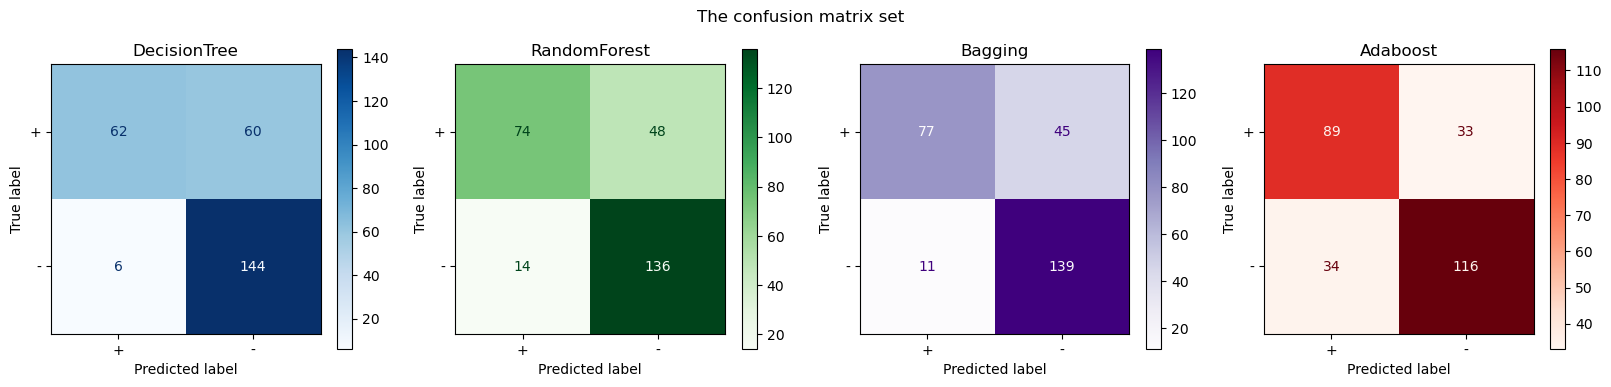

In [51]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(ncols=4, figsize=(20, 3.9))


dtm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues, ax=axs[0])
axs[0].set_title("DecisionTree")

rfm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens, ax=axs[1])
axs[1].set_title("RandomForest")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest2, labels=clf2.classes_, cmap= plt.cm.Purples, ax=axs[2])
axs[2].set_title("Bagging")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest3, labels=clf3.classes_, cmap= plt.cm.Reds, ax=axs[3])
axs[3].set_title("Adaboost")

fig.suptitle('The confusion matrix set')


Let's judge their performance through some features

In [52]:
from sklearn.metrics import classification_report

print('Evaluation Start')

print("------------------------Decision Tree------------------------------")
print(classification_report(Y_test, Y_predTest, target_names=clf.classes_))

print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain))
print('Test', accuracy_score(Y_test, Y_predTest))

print("------------------------Random Forest-------------------------------")
print(classification_report(Y_test, Y_predTest1, target_names=clf1.classes_))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain1))
print('Test', accuracy_score(Y_test, Y_predTest1))

print("---------------------------Bagging----------------------------------")
print(classification_report(Y_test, Y_predTest2, target_names=clf2.classes_))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain2))
print('Test', accuracy_score(Y_test, Y_predTest2))

print("---------------------------AdaBoost---------------------------------")
print(classification_report(Y_test, Y_predTest3, target_names=clf3.classes_))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain3))
print('Test', accuracy_score(Y_test, Y_predTest3))


print("-------------------------End of the report--------------------------")


Evaluation Start
------------------------Decision Tree------------------------------
              precision    recall  f1-score   support

           +       0.91      0.51      0.65       122
           -       0.71      0.96      0.81       150

    accuracy                           0.76       272
   macro avg       0.81      0.73      0.73       272
weighted avg       0.80      0.76      0.74       272

---------------Accuracy---------------
Train 0.7315270935960592
Test 0.7573529411764706
------------------------Random Forest-------------------------------
              precision    recall  f1-score   support

           +       0.84      0.61      0.70       122
           -       0.74      0.91      0.81       150

    accuracy                           0.77       272
   macro avg       0.79      0.76      0.76       272
weighted avg       0.78      0.77      0.77       272

---------------Accuracy---------------
Train 0.7832512315270936
Test 0.7720588235294118
----------------

## 2.  Illustrate the differences between these classifiers and compare the model performances. (30 points)



### <font color = 'LightGreen'>Decision tree</font>

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.

- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

### <font color = 'LightBlue'>Ensemble Learning</font>

**Random Forest, Bagging and Adaboost** are Ensemble learning methods.

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then average their predictions. On average, the combined estimator is usually better than any of the single base estimators because its variance is reduced.

    Examples: Bagging methods, Forests of randomized trees, …

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

    Examples: AdaBoost, Gradient Tree Boosting, …

#### <font color = 'LightBlue'>Random Forest</font>

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features.

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

#### <font color = 'LightBlue'>Bagging</font>

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:

- When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as **Pasting**.

- When samples are drawn with replacement, then the method is known as **Bagging**.

- When random subsets of the dataset are drawn as random subsets of the features, then the method is known as **Random Subspaces**.

- Finally, when base estimators are built on subsets of both samples and features, then the method is known as **Random Patches**.

#### <font color='LightBlue'>AdaBoost</font>
The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire.

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights 
_w<sub>1</sub>_, _w<sub>2</sub>_ , …,_w<sub>N</sub>_  to each of the training samples. 

Initially, those weights are all set to _w<sub>i</sub> = 1 / N_, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

AdaBoost can be used both for classification and regression problems.

### Comparison
In this assignment, the data is relevant to the credit card approval, we don't want to misjudge anyone who should get the approval or not, so we need balance the precision and misjudgement, therefore, we choose **F1-Score** as the comparison standard.

Therefore, the **Bagging** is the best model among them, which Macro F1-Score is 0.78

## 3.  Use the credictcard-reduced.csv dataset ([Data description](https://www.kaggle.com/mlg-ulb/creditcardfraud)) and build Five classification models. Please evaluate your model performance (40 points). A list of classification models can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

### Data preparation


In [53]:
fraud_data = pd.read_csv('creditcard-reduced.csv',header='infer')

Y = fraud_data['Class'] #this is our prediction target
X = fraud_data.drop(['Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42) 

fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32759,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
32760,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
32761,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
32762,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Classification

In [54]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

#RandomForest
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf1 = RandomForestClassifier(n_estimators=5)
clf1 = clf1.fit(X_train, Y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

#Bagging
np.random.seed(1)
clf2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain2 = clf2.predict(X_train)
Y_predTest2 = clf2.predict(X_test)

#Adaboost
np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain3 = clf3.predict(X_train)
Y_predTest3 = clf3.predict(X_test)

#RBF SVM
from sklearn.svm import SVC
np.random.seed(1)
clf4 = SVC(kernel='rbf', gamma='scale')#gamma is the key parameter for the RBF SVM, define as 'scale' to see it's better or not
clf4 = clf4.fit(X_train, Y_train)
Y_predTrain4 = clf4.predict(X_train)
Y_predTest4 = clf4.predict(X_test)

Confusion Matrixs presentation

Text(0.5, 0.98, 'The confusion matrix set')

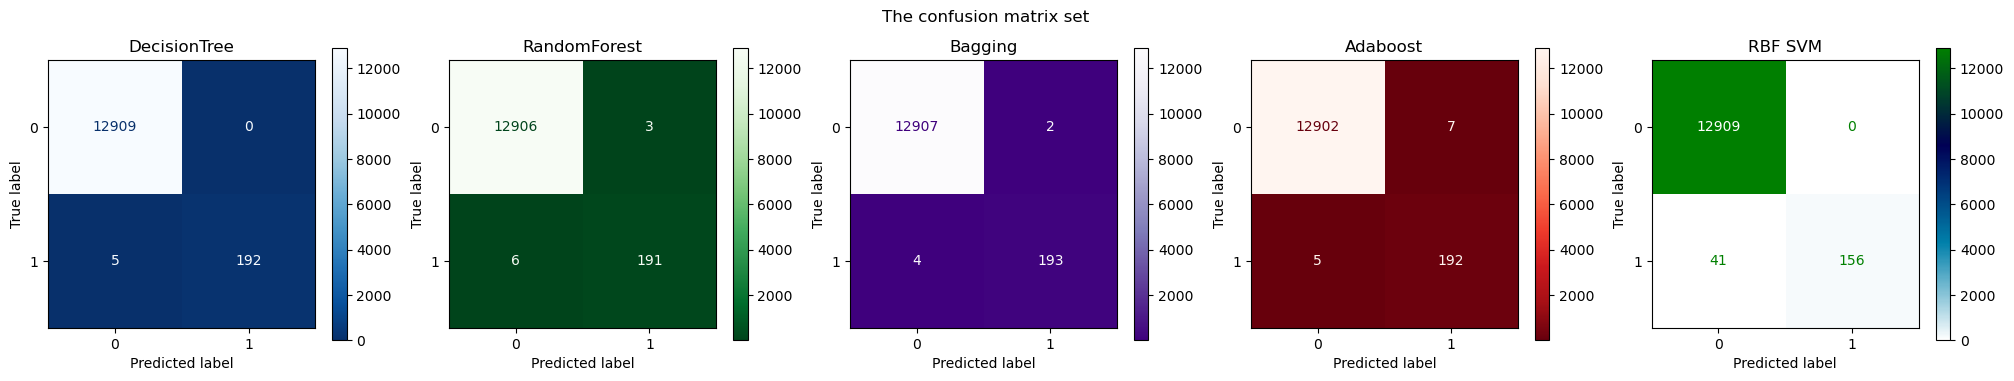

In [55]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(ncols=5, figsize=(25, 3.8))


dtm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues_r, ax=axs[0])
axs[0].set_title("DecisionTree")

rfm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens_r, ax=axs[1])
axs[1].set_title("RandomForest")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest2, labels=clf2.classes_, cmap= plt.cm.Purples_r,ax=axs[2])
axs[2].set_title("Bagging")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest3, labels=clf3.classes_, cmap= plt.cm.Reds_r, ax=axs[3])
axs[3].set_title("Adaboost")

rsm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest4, labels=clf4.classes_, cmap= plt.cm.ocean_r, ax=axs[4])
axs[4].set_title("RBF SVM")


fig.suptitle("The confusion matrix set")

Classification reports

In [56]:
from sklearn.metrics import classification_report

print('Evaluation Start')

print("------------------------Decision Tree------------------------------")
print(classification_report(Y_test, Y_predTest, target_names=['non-fraud','fraud']))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain))
print('Test', accuracy_score(Y_test, Y_predTest))

print("------------------------Random Forest-------------------------------")
print(classification_report(Y_test, Y_predTest1, target_names=['non-fraud','fraud']))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain1))
print('Test', accuracy_score(Y_test, Y_predTest1))

print("---------------------------Bagging----------------------------------")
print(classification_report(Y_test, Y_predTest2, target_names=['non-fraud','fraud']))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain2))
print('Test', accuracy_score(Y_test, Y_predTest2))

print("---------------------------AdaBoost---------------------------------")
print(classification_report(Y_test, Y_predTest3, target_names=['non-fraud','fraud']))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain3))
print('Test', accuracy_score(Y_test, Y_predTest3))

print("---------------------------RBF SVM----------------------------------")
print(classification_report(Y_test, Y_predTest4, target_names=['non-fraud','fraud']))
print('---------------Accuracy---------------')
print('Train', accuracy_score(Y_train,Y_predTrain4))
print('Test', accuracy_score(Y_test, Y_predTest4))
print("-------------------------End of the report--------------------------")


Evaluation Start
------------------------Decision Tree------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud       1.00      0.97      0.99       197

    accuracy                           1.00     13106
   macro avg       1.00      0.99      0.99     13106
weighted avg       1.00      1.00      1.00     13106

---------------Accuracy---------------
Train 0.999542171126259
Test 0.9996184953456432
------------------------Random Forest-------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud       0.98      0.97      0.98       197

    accuracy                           1.00     13106
   macro avg       0.99      0.98      0.99     13106
weighted avg       1.00      1.00      1.00     13106

---------------Accuracy---------------
Train 0.9998473903754197
Test 0.9993132916221578
-----------------

#### Evaluation
All models can perfectly predict the non-fraud credit card trend, so we meanly focus on the performance of fraud trade, the Adaboost makes the best classification in these models. RBF SVM is not as good as the trees and Ensemble learning model.




## 4.  Bonus credits:

    (extra 1/100 points to Final GPA calculation)

Learn from the documentation for [imbalanced classification](https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples) and use any of the sampling methods to deal with the `credictcard-reduced.csv` dataset. Evaluate model performance.

From Quiz 3, We can feel that this dataset is obviously unbalanced.

Therefore, we need to deal with this dataset, In this part, the **2:1** and **1:1** under-sampling and over-sampling methods will be applied.

### 4.1 Try the **float** method firstly, makes the dataset become 2:1

In [64]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42) 

sampling_strategy = 0.5
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train, Y_train = rus.fit_resample(X, Y)

Let's see what happened, firstly, under-sample.

Text(0.5, 0.98, 'The confusion matrix set (under-sample)')

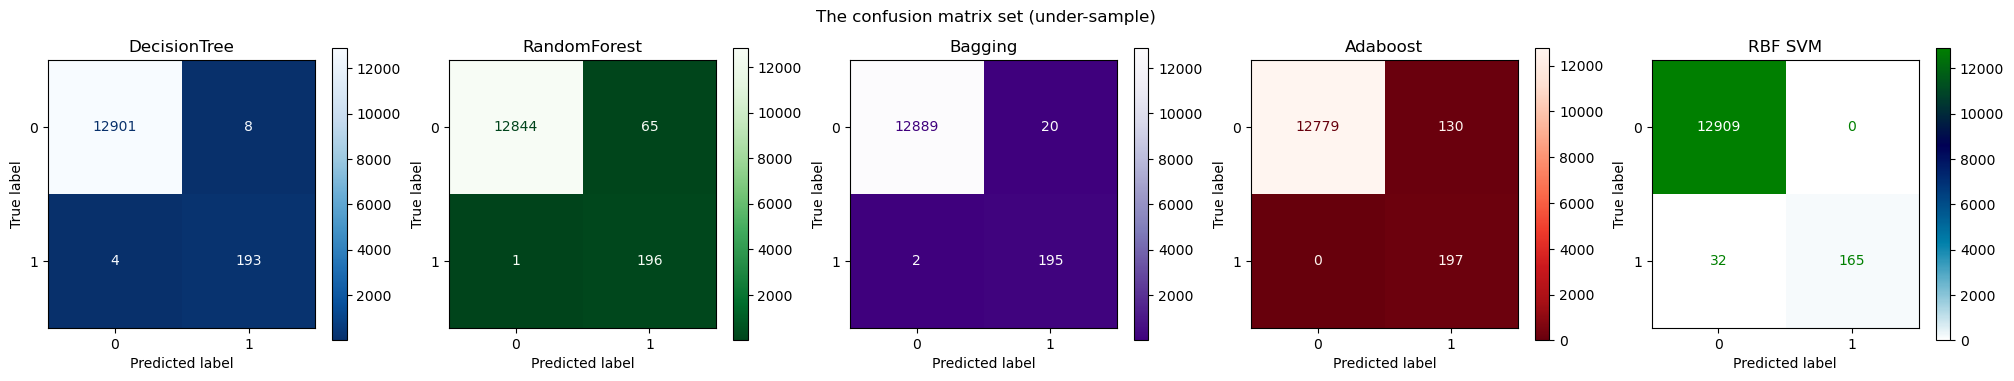

In [65]:

#DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

#RandomForest
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf1 = RandomForestClassifier(n_estimators=5)
clf1 = clf1.fit(X_train, Y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

#Bagging
np.random.seed(1)
clf2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain2 = clf2.predict(X_train)
Y_predTest2 = clf2.predict(X_test)

#Adaboost
np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain3 = clf3.predict(X_train)
Y_predTest3 = clf3.predict(X_test)

#RBF SVM
from sklearn.svm import SVC
np.random.seed(1)
clf4 = SVC(kernel='rbf', gamma='scale')#gamma is the key parameter for the RBF SVM, define as 'scale' to see it's better or not
clf4 = clf4.fit(X_train, Y_train)
Y_predTrain4 = clf4.predict(X_train)
Y_predTest4 = clf4.predict(X_test)

fig, axs = plt.subplots(ncols=5, figsize=(25, 3.8))


dtm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues_r, ax=axs[0])
axs[0].set_title("DecisionTree")

rfm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens_r, ax=axs[1])
axs[1].set_title("RandomForest")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest2, labels=clf2.classes_, cmap= plt.cm.Purples_r,ax=axs[2])
axs[2].set_title("Bagging")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest3, labels=clf3.classes_, cmap= plt.cm.Reds_r, ax=axs[3])
axs[3].set_title("Adaboost")

rsm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest4, labels=clf4.classes_, cmap= plt.cm.ocean_r, ax=axs[4])
axs[4].set_title("RBF SVM")

fig.suptitle("The confusion matrix set (under-sample)")

In [66]:
from sklearn.metrics import classification_report

print('Evaluation Start')

print("------------------------Decision Tree------------------------------")
print(classification_report(Y_test, Y_predTest, target_names=['non-fraud','fraud']))


print("------------------------Random Forest-------------------------------")
print(classification_report(Y_test, Y_predTest1, target_names=['non-fraud','fraud']))


print("---------------------------Bagging----------------------------------")
print(classification_report(Y_test, Y_predTest2, target_names=['non-fraud','fraud']))


print("---------------------------AdaBoost---------------------------------")
print(classification_report(Y_test, Y_predTest3, target_names=['non-fraud','fraud']))


print("---------------------------RBF SVM----------------------------------")
print(classification_report(Y_test, Y_predTest4, target_names=['non-fraud','fraud']))

print("-------------------------End of the report--------------------------")



Evaluation Start
------------------------Decision Tree------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud       0.96      0.98      0.97       197

    accuracy                           1.00     13106
   macro avg       0.98      0.99      0.98     13106
weighted avg       1.00      1.00      1.00     13106

------------------------Random Forest-------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      0.99      1.00     12909
       fraud       0.75      0.99      0.86       197

    accuracy                           0.99     13106
   macro avg       0.88      0.99      0.93     13106
weighted avg       1.00      0.99      1.00     13106

---------------------------Bagging----------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud  

The decision tree get the best F1-score through the model, which can cover the precision and recall rate.

Text(0.5, 0.98, 'The confusion matrix set (over-sample)')

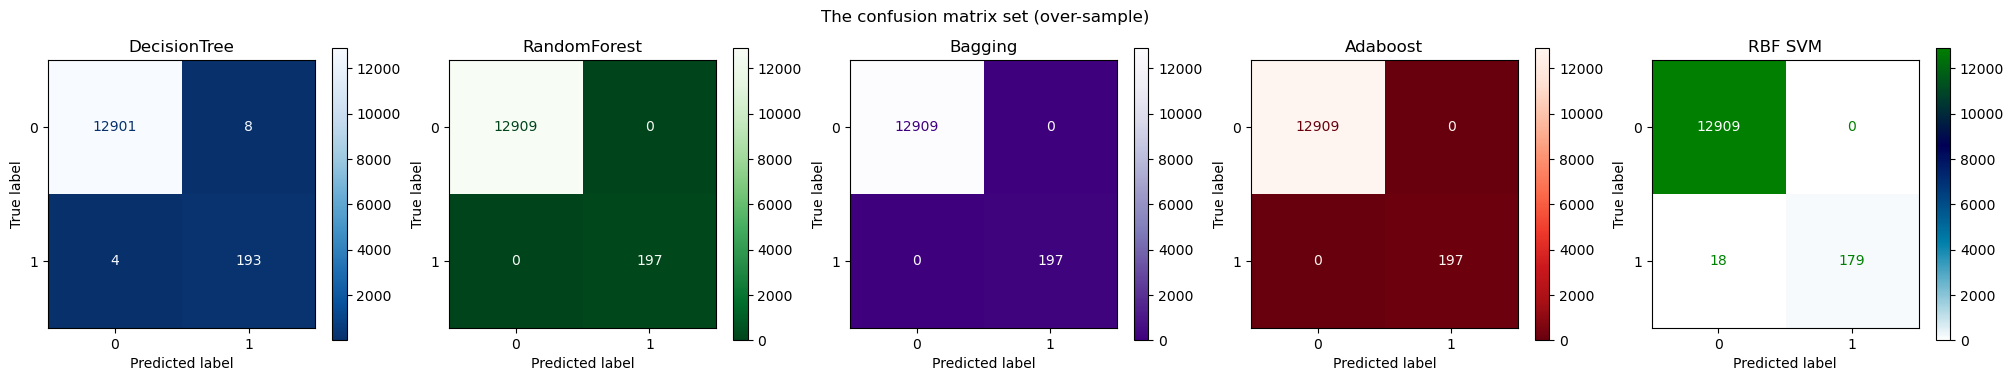

In [67]:
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_train, Y_train= ros.fit_resample(X, Y)

#DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

#RandomForest
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf1 = RandomForestClassifier(n_estimators=5)
clf1 = clf1.fit(X_train, Y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

#Bagging
np.random.seed(1)
clf2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain2 = clf2.predict(X_train)
Y_predTest2 = clf2.predict(X_test)

#Adaboost
np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain3 = clf3.predict(X_train)
Y_predTest3 = clf3.predict(X_test)

#RBF SVM
from sklearn.svm import SVC
np.random.seed(1)
clf4 = SVC(kernel='rbf', gamma='scale')#gamma is the key parameter for the RBF SVM, define as 'scale' to see it's better or not
clf4 = clf4.fit(X_train, Y_train)
Y_predTrain4 = clf4.predict(X_train)
Y_predTest4 = clf4.predict(X_test)

fig, axs = plt.subplots(ncols=5, figsize=(25, 3.8))


dtm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues_r, ax=axs[0])
axs[0].set_title("DecisionTree")

rfm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens_r, ax=axs[1])
axs[1].set_title("RandomForest")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest2, labels=clf2.classes_, cmap= plt.cm.Purples_r,ax=axs[2])
axs[2].set_title("Bagging")

bgm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest3, labels=clf3.classes_, cmap= plt.cm.Reds_r, ax=axs[3])
axs[3].set_title("Adaboost")

rsm = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predTest4, labels=clf4.classes_, cmap= plt.cm.ocean_r, ax=axs[4])
axs[4].set_title("RBF SVM")

fig.suptitle("The confusion matrix set (over-sample)")

In [68]:
from sklearn.metrics import classification_report

print('Evaluation Start')

print("------------------------Decision Tree------------------------------")
print(classification_report(Y_test, Y_predTest, target_names=['non-fraud','fraud']))


print("------------------------Random Forest-------------------------------")
print(classification_report(Y_test, Y_predTest1, target_names=['non-fraud','fraud']))


print("---------------------------Bagging----------------------------------")
print(classification_report(Y_test, Y_predTest2, target_names=['non-fraud','fraud']))


print("---------------------------AdaBoost---------------------------------")
print(classification_report(Y_test, Y_predTest3, target_names=['non-fraud','fraud']))


print("---------------------------RBF SVM----------------------------------")
print(classification_report(Y_test, Y_predTest4, target_names=['non-fraud','fraud']))

print("-------------------------End of the report--------------------------")


Evaluation Start
------------------------Decision Tree------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud       0.96      0.98      0.97       197

    accuracy                           1.00     13106
   macro avg       0.98      0.99      0.98     13106
weighted avg       1.00      1.00      1.00     13106

------------------------Random Forest-------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud       1.00      1.00      1.00       197

    accuracy                           1.00     13106
   macro avg       1.00      1.00      1.00     13106
weighted avg       1.00      1.00      1.00     13106

---------------------------Bagging----------------------------------
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     12909
       fraud  

Note: 0.5 makes the dataset become 2:1, however, it did not make the result better.Over sample makes the model over-fitting